# Número de Hóspedes em Portugal 2010-2019

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsa
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.style.use('seaborn')

def acf_pacf(x):
    fig=plt.figure(figsize=(16,10))
    ax1=fig.add_subplot(221)
    fig=sm.graphics.tsa.plot_acf(x,lags=25,ax=ax1)
    ax2=fig.add_subplot(222)
    fig=sm.graphics.tsa.plot_pacf(x,lags=25,ax=ax2)

In [2]:
dataset=pd.read_excel('HospedesEmPortugal.xlsx')
dataset["Date"]=pd.to_datetime(dataset["Date"])
dataset = dataset.set_index('Date')
dataset.head(5)

,Hóspedes
Date,
2010-01-31,669265
2010-02-28,732526
2010-03-31,919591
2010-04-30,1138254
2010-05-31,1288756


No handles with labels found to put in legend.


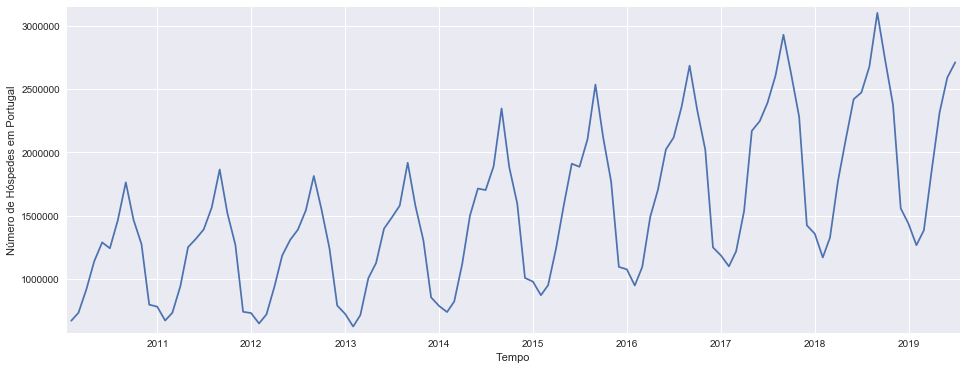

In [3]:
plt.figure(figsize=(16,6))
plt.plot(dataset['Hóspedes'])
plt.xlabel('Tempo')
plt.ylabel('Número de Hóspedes em Portugal')
plt.margins(x=0.005,y=0.02)
plt.legend()
plt.show()

In [4]:
dif=np.log(dataset['Hóspedes']/dataset['Hóspedes'].shift(1))
dif12=np.log(dataset['Hóspedes']/dataset['Hóspedes'].shift(12))

No handles with labels found to put in legend.


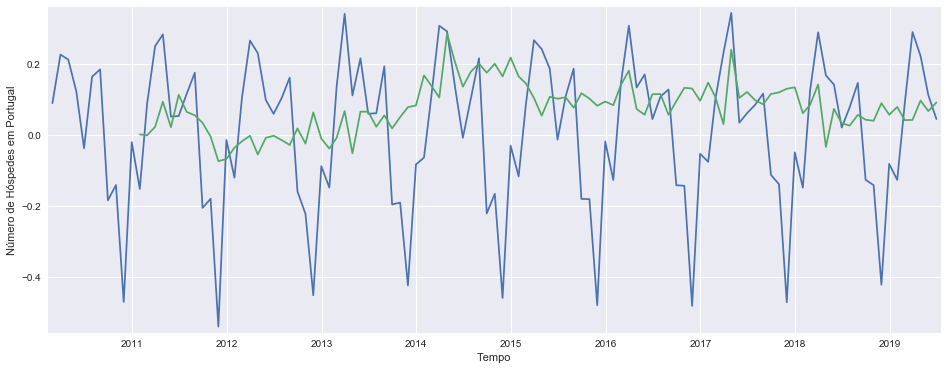

count    113.000000
mean       0.012386
std        0.204530
min       -0.539983
25%       -0.126544
50%        0.061903
75%        0.147494
max        0.344978
Name: Hóspedes, dtype: float64

In [5]:
plt.figure(figsize=(16,6))
plt.plot(dif)
plt.plot(dif12)
plt.xlabel('Tempo')
plt.ylabel('Número de Hóspedes em Portugal')
plt.margins(x=0.005,y=0.02)
plt.legend()
plt.show()
dif.dropna().describe()

c:\users\banana\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


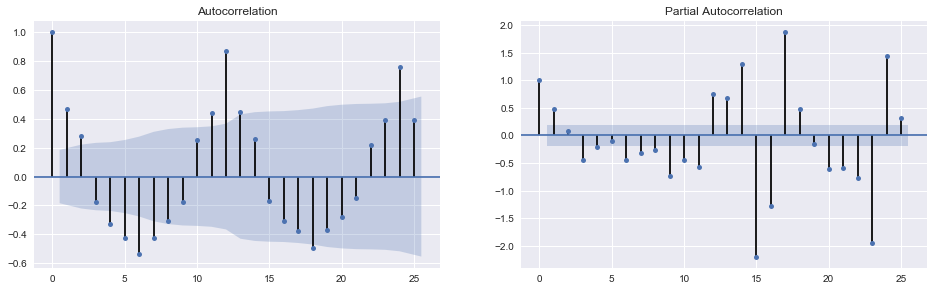

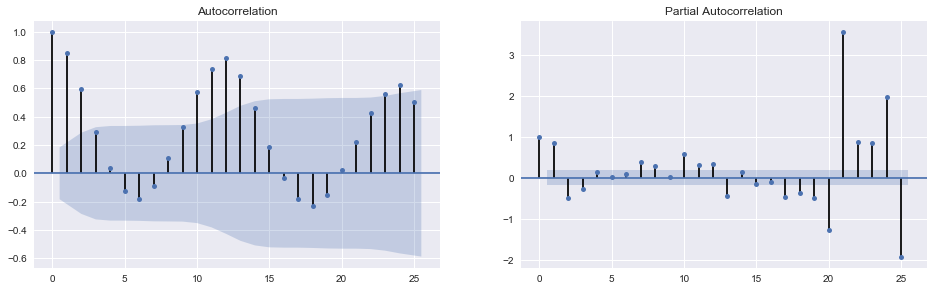

In [6]:
acf_pacf(dif.dropna())
acf_pacf(dataset['Hóspedes'])

In [7]:
arma_mod = sm.tsa.ARMA(dif12.dropna(), order=(3,0))
arma_res = arma_mod.fit(disp=-1)
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:               Hóspedes   No. Observations:                  102
Model:                     ARMA(3, 0)   Log Likelihood                 169.971
Method:                       css-mle   S.D. of innovations              0.045
Date:                Wed, 06 Nov 2019   AIC                           -329.941
Time:                        17:00:07   BIC                           -316.816
Sample:                             0   HQIC                          -324.626
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0709      0.028      2.522      0.013       0.016       0.126
ar.L1.Hóspedes     0.2750      0.092      2.977      0.004       0.094       0.456
ar.L2.Hóspedes     0.2461      0.093

c:\users\banana\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [8]:
mod = sm.tsa.statespace.SARIMAX(dif.dropna(), order=(2,2,0), seasonal_order=(0, 0, 0, 12))
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Hóspedes   No. Observations:                  113
Model:               SARIMAX(2, 2, 0)   Log Likelihood                   3.205
Date:                Wed, 06 Nov 2019   AIC                             -0.409
Time:                        17:00:08   BIC                              7.720
Sample:                             0   HQIC                             2.888
                                - 113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8564      0.185     -4.626      0.000      -1.219      -0.494
ar.L2         -0.1909      0.131     -1.460      0.144      -0.447       0.065
sigma2         0.0549      0.009      6.287      0.0

c:\users\banana\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


c:\users\banana\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
No handles with labels found to put in legend.


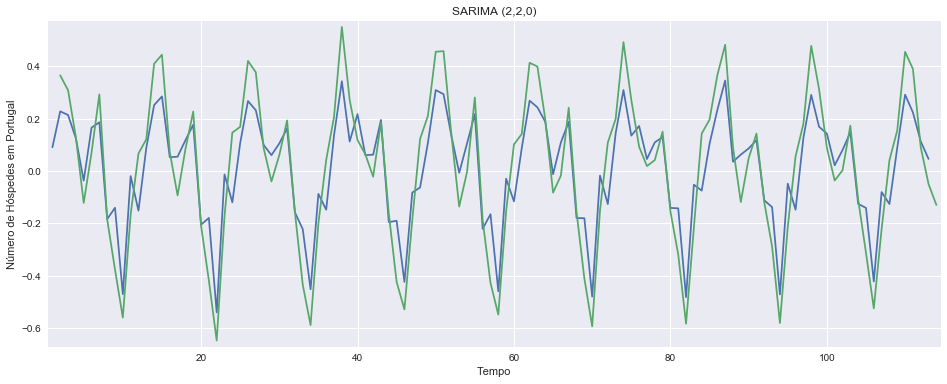

In [9]:
nforecast = 1
predict = res.get_prediction(end=mod.nobs + nforecast)
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)

plots =pd.DataFrame({'Série das Diferenças':dif.reset_index()['Hóspedes'],
                     'Expected Value':predict.predicted_mean})

plt.figure(figsize=(16,6))
plt.plot(plots['Série das Diferenças'])
plt.plot(plots['Expected Value'][2:])
plt.xlabel('Tempo')
plt.ylabel('Número de Hóspedes em Portugal')
plt.margins(x=0.005,y=0.02)
plt.legend()
plt.title('SARIMA (2,2,0)')
plt.show()

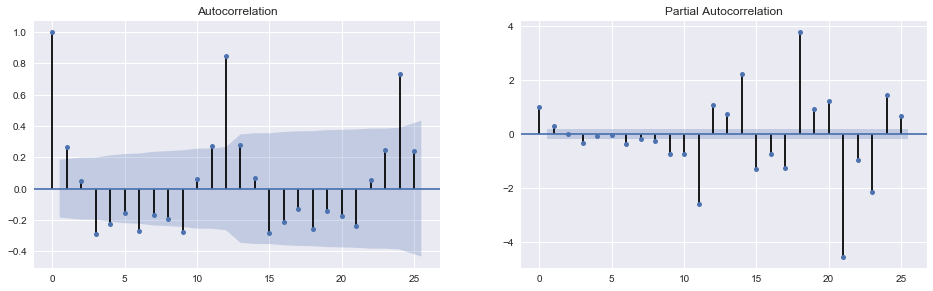

In [10]:
residuos = plots['Expected Value'][2:-1]-plots['Série das Diferenças'][2:-1]
acf_pacf(residuos)

In [11]:
previsto = np.exp(plots['Expected Value'][2:])
hospedes = dataset['Hóspedes'].reset_index()['Hóspedes'][1:].set_value(114,2713037)[1:]
final = previsto*hospedes

c:\users\banana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


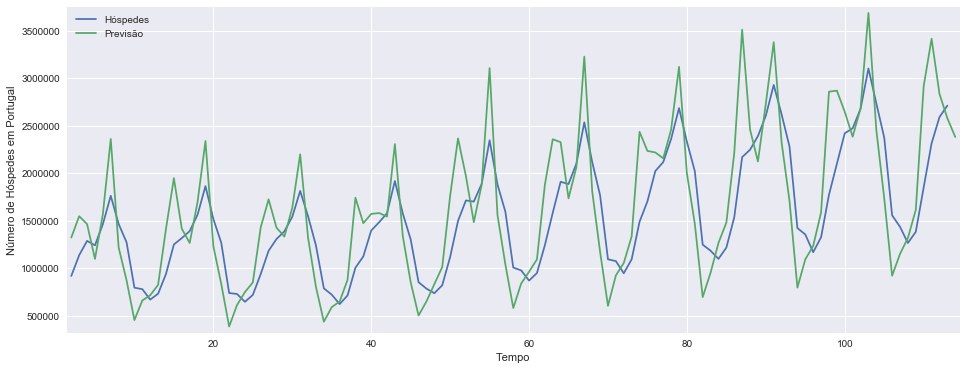

In [12]:
plt.figure(figsize=(16,6))
plt.plot(hospedes[:-1], label='Hóspedes')
plt.plot(final, label='Previsão')
plt.xlabel('Tempo')
plt.ylabel('Número de Hóspedes em Portugal')
plt.margins(x=0.005,y=0.02)
plt.legend()
plt.show()